# Analisis Prediktif: Prediksi Calon Pelanggan Asuransi Kendaraan yang Potensial dengan Waktu Secepatnya
---
Oleh: [Abraham Naiborhu](https://www.dicoding.com/users/abrahampn)

*Proyek Submission Satu - Machine Learning Terapan Dicoding*

---

##Pendahuluan
Proyek ini membahas topik asuransi yang dibuat untuk memprediksi calon pelanggan potensial yang tertarik untuk membeli asuransi kendaraan dan pelanggan tersebut sudah memiliki asuransi kesehatan. Dataset diambil dari url: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction



## Mengimport pustaka/modul python yang dibutuhkan

In [1]:
!pip install opendatasets

import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Getting the dataset
Saat menggunakan Opendatasets, diharapkan pengguna menyiapkan kaggle (karena dataset dari kaggle) username dan kaggle key

In [2]:
od.download("https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: avrahaem
Your Kaggle Key: ··········


100%|██████████| 6.47M/6.47M [00:00<00:00, 52.2MB/s]

In [3]:
df_train = ("/content/health-insurance-cross-sell-prediction/train.csv")
df_test = ("/content/health-insurance-cross-sell-prediction/test.csv")
sample = ("/content/health-insurance-cross-sell-prediction/sample_submission.csv")

##Data understanding
Bagian ini akan menjelaskan mengenai karakteristik dari dataset yang didapatkan

### Train Data
| Variable | Definition |
|----------|--------|
| id | Unique ID for the customer|
| Gender | Gender of the customer |
| Age | Age of the customer |
| Driving_License | 0 : Customer does not have DL, 1 : Customer already has DL|
| Region_Code | Unique code for the region of the customer |
| Previously_Insured | 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance |
| Vehicle_Age | Age of the Vehicle |
| Vehicle_Damage | 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past. |
| Annual_Premium | The amount customer needs to pay as premium in the year |
| PolicySalesChannel | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |
| Vintage | Number of Days, Customer has been associated with the company |
| Response | 1 : Customer is interested, 0 : Customer is not interested |



### Test Data
| Variable | Definition |
|-----|-----|
| id | Unique ID for the customer|
| Gender | Gender of the customer |
| Age | Age of the customer |
| Driving_License | 0 : Customer does not have DL, 1 : Customer already has DL|
| Region_Code | Unique code for the region of the customer |
| Previously_Insured | 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance |
| Vehicle_Age | Age of the Vehicle |
| Vehicle_Damage | 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past. |
| Annual_Premium | The amount customer needs to pay as premium in the year |
| PolicySalesChannel | Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. |

### Sample Data

| Variable | Definition |
|-----|-----|
| id | Unique ID for the customer|
| Response | 1 : Customer is interested, 0 : Customer is not interested |

## Dataset Checking
Di bagian ini, kita akan melihat secara langsung mengenai karakteristik datasetnya

In [4]:
df_train = pd.read_csv(df_train) 
df_test = pd.read_csv(df_test)
sample = pd.read_csv(sample)

### All about df_train

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [7]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### All about df_test

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [9]:
df_test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [10]:
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


### All about sample

In [11]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   id        127037 non-null  int64
 1   Response  127037 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


In [12]:
sample.describe()

,id,Response
count,127037.000000,127037.0
mean,444628.000000,0.0
std,36672.567411,0.0
min,381110.000000,0.0
25%,412869.000000,0.0
50%,444628.000000,0.0
75%,476387.000000,0.0
max,508146.000000,0.0


In [13]:
sample

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


## Data Analysis
Di bagian ini kita akan menelusuri datanya dan melakukan data handling.

### Setting Up the Dataset

#### Handling missing values

In [14]:
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### Handling unused variable
Disini kita akan drop ID karena itu tidak dibutukan dalam model ini

In [15]:
df_train = df_train.drop('id', axis = 1)
df_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [16]:
df_train.shape

(381109, 11)

#### Handling Outliers
Outliers merupakan data yang memiliki karakteristik yang berbeda jauh dari data data lainnya. Data tipe ini dapat muncul dalam bentuk yang ekstrim. Oleh sebab itu, data semacam ini harus disaring dan dibuang.

In [17]:
#Finding the numerical data
numerical_data = []
for i in df_train.columns:
  if(df_train.dtypes[i] == 'int64' or df_train[i].dtypes == 'float64'):
    numerical_data.append(i)
print(numerical_data)

['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


In [18]:
#polishing the numerical data (kita akan mendrop data)
numerical_data.pop(1)
numerical_data.pop(-1)
print(numerical_data)

['Age', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


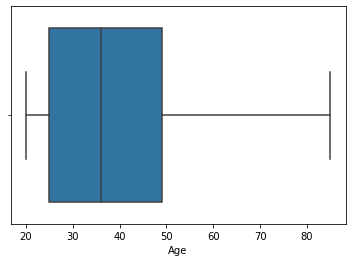

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


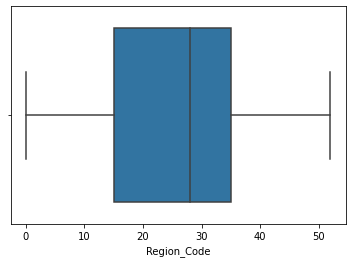

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


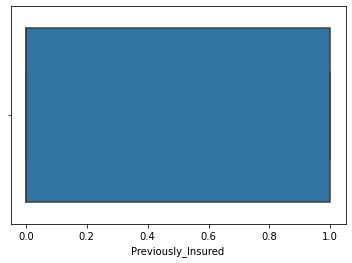

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


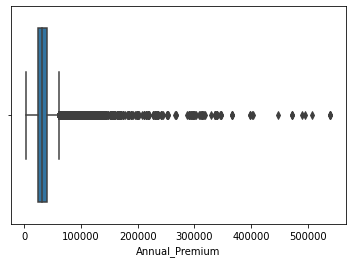

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


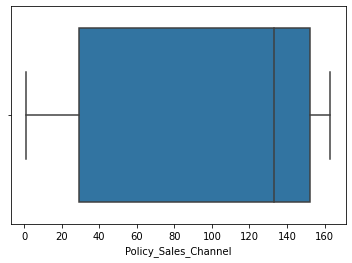

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


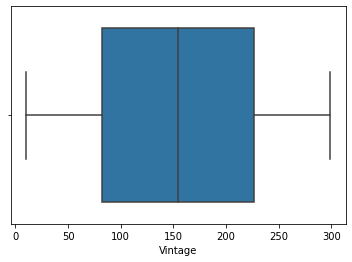

In [19]:
#Visualisasi box plot untuk mengecek outliers
for columns in numerical_data:
  sns.boxplot(df_train[columns])
  plt.show()

In [20]:
#Rumus dari IQR
#Batas bawah = Q1 - 1.5 * IQR
#Batas atas = Q3 + 1.5 * IQR

Q1 = df_train[numerical_data].quantile(0.25)
Q2 = df_train[numerical_data].quantile(0.5)
Q3 = df_train[numerical_data].quantile(0.75)
IQR = Q3 - Q1
df_train = df_train[~((df_train<(Q1-1.5*IQR))|(df_train>(Q3+1.5*IQR))).any(axis=1)]
df_train.shape

(370789, 11)

In [21]:
df_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### Univariate Analysis

In [22]:
#Bagi feature menjadi dua set (Numerical dan categorical)
categorical_data = ['Gender','Driving_License',
         'Previously_Insured',
         'Vehicle_Age',
         'Vehicle_Damage']
numerical_data = ['Age','Region_Code',
         'Annual_Premium',
         'Policy_Sales_Channel',
         'Vintage']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


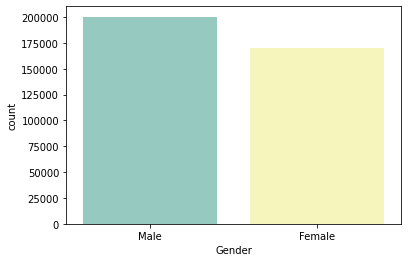

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


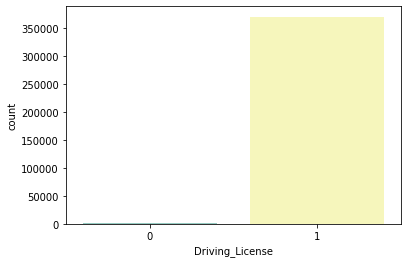

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


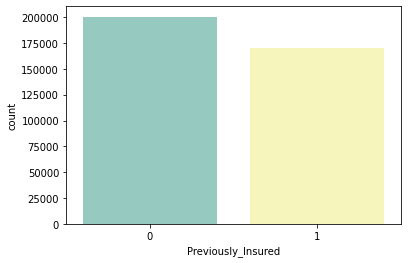

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


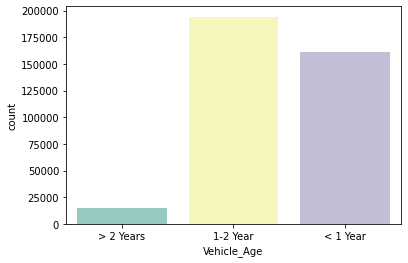

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


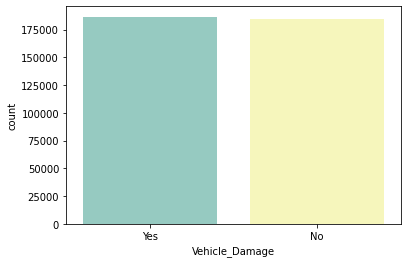

In [23]:
#Categorical Feature
for i in categorical_data:
    sns.countplot(df_train[i], palette = 'Set3')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


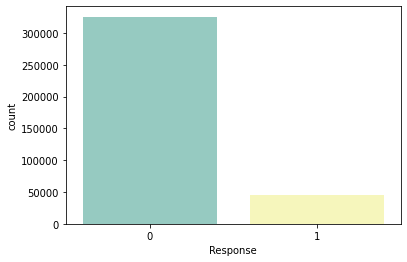

In [24]:
sns.countplot(df_train['Response'], palette = 'Set3')
plt.show()

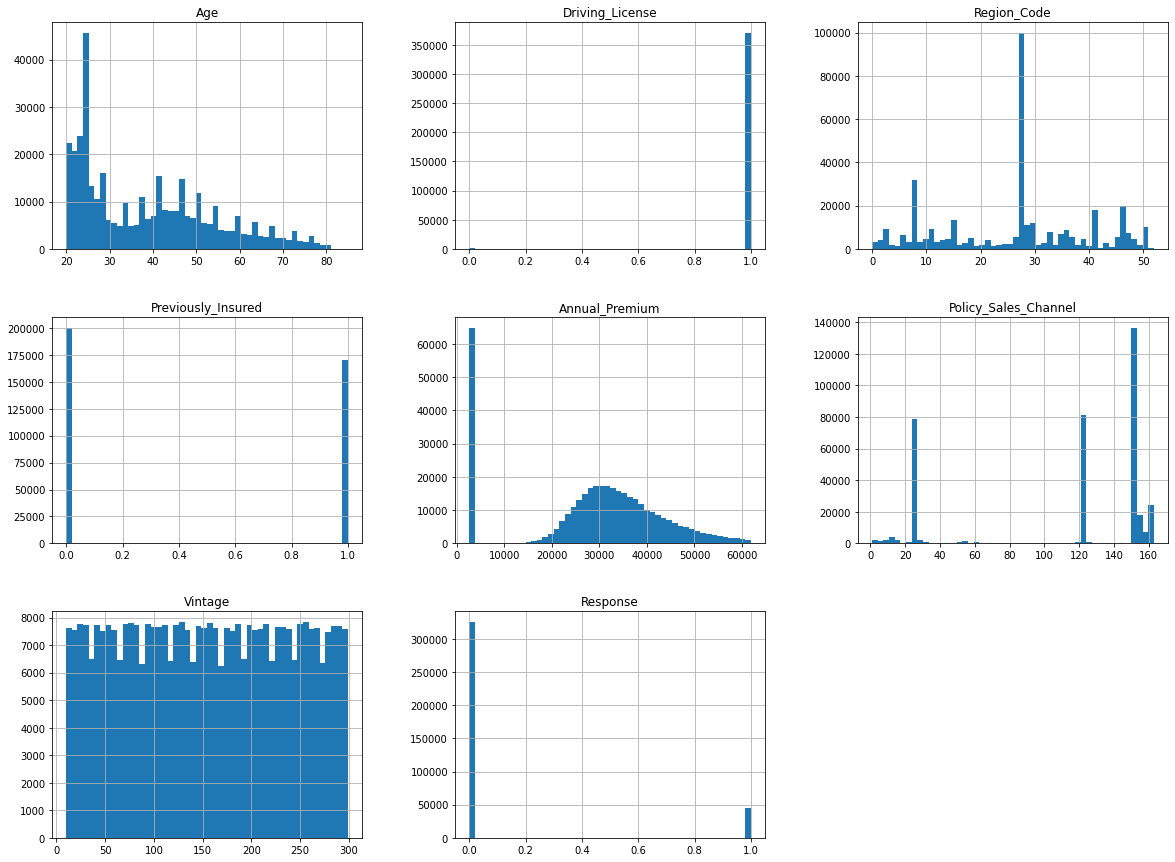

In [25]:
#Numerical feature
df_train.hist(bins=50, figsize=(20,15))
plt.show()

### Multivariate Analysis

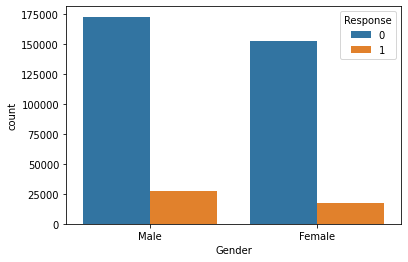

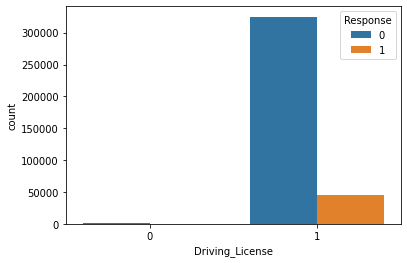

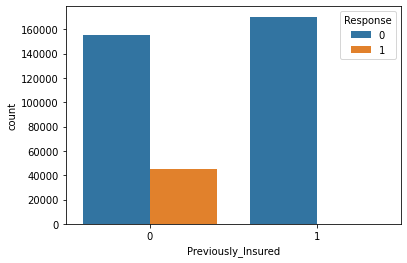

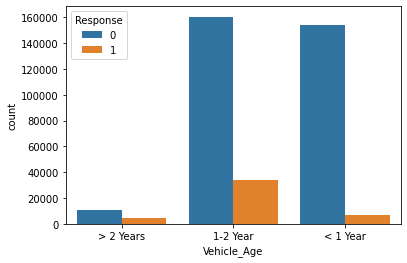

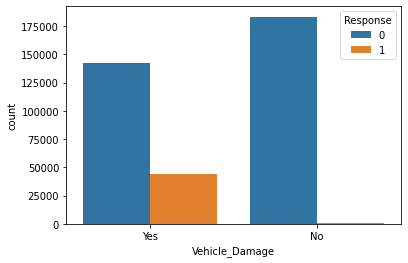

In [26]:
#Hubungan antara categorical feature terhadap response
for col in categorical_data:
    sns.countplot(x = col, hue = 'Response', data = df_train)
    plt.show()

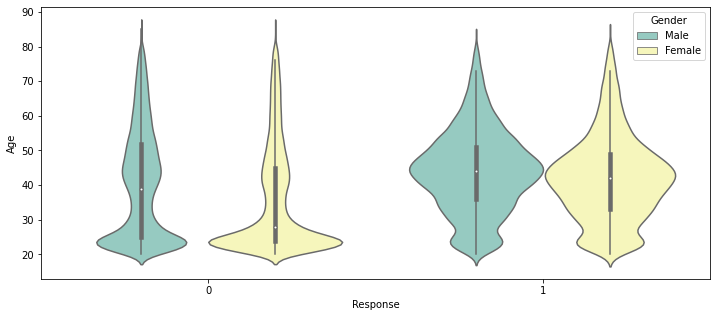

In [27]:
#Hubungan antara response, umur, dan gender
plt.figure(figsize = (12,5))
sns.violinplot(x = 'Response', y = 'Age', hue = 'Gender', data = df_train, palette = 'Set3')
plt.show()

Visualisasi diatas menjelaskan bahwa orang yang berumur 20 - 30 tahun memilih untuk tidak memberikan response, sedangkan yang berumur 40 - 50 memilih untuk mengatakan iya.

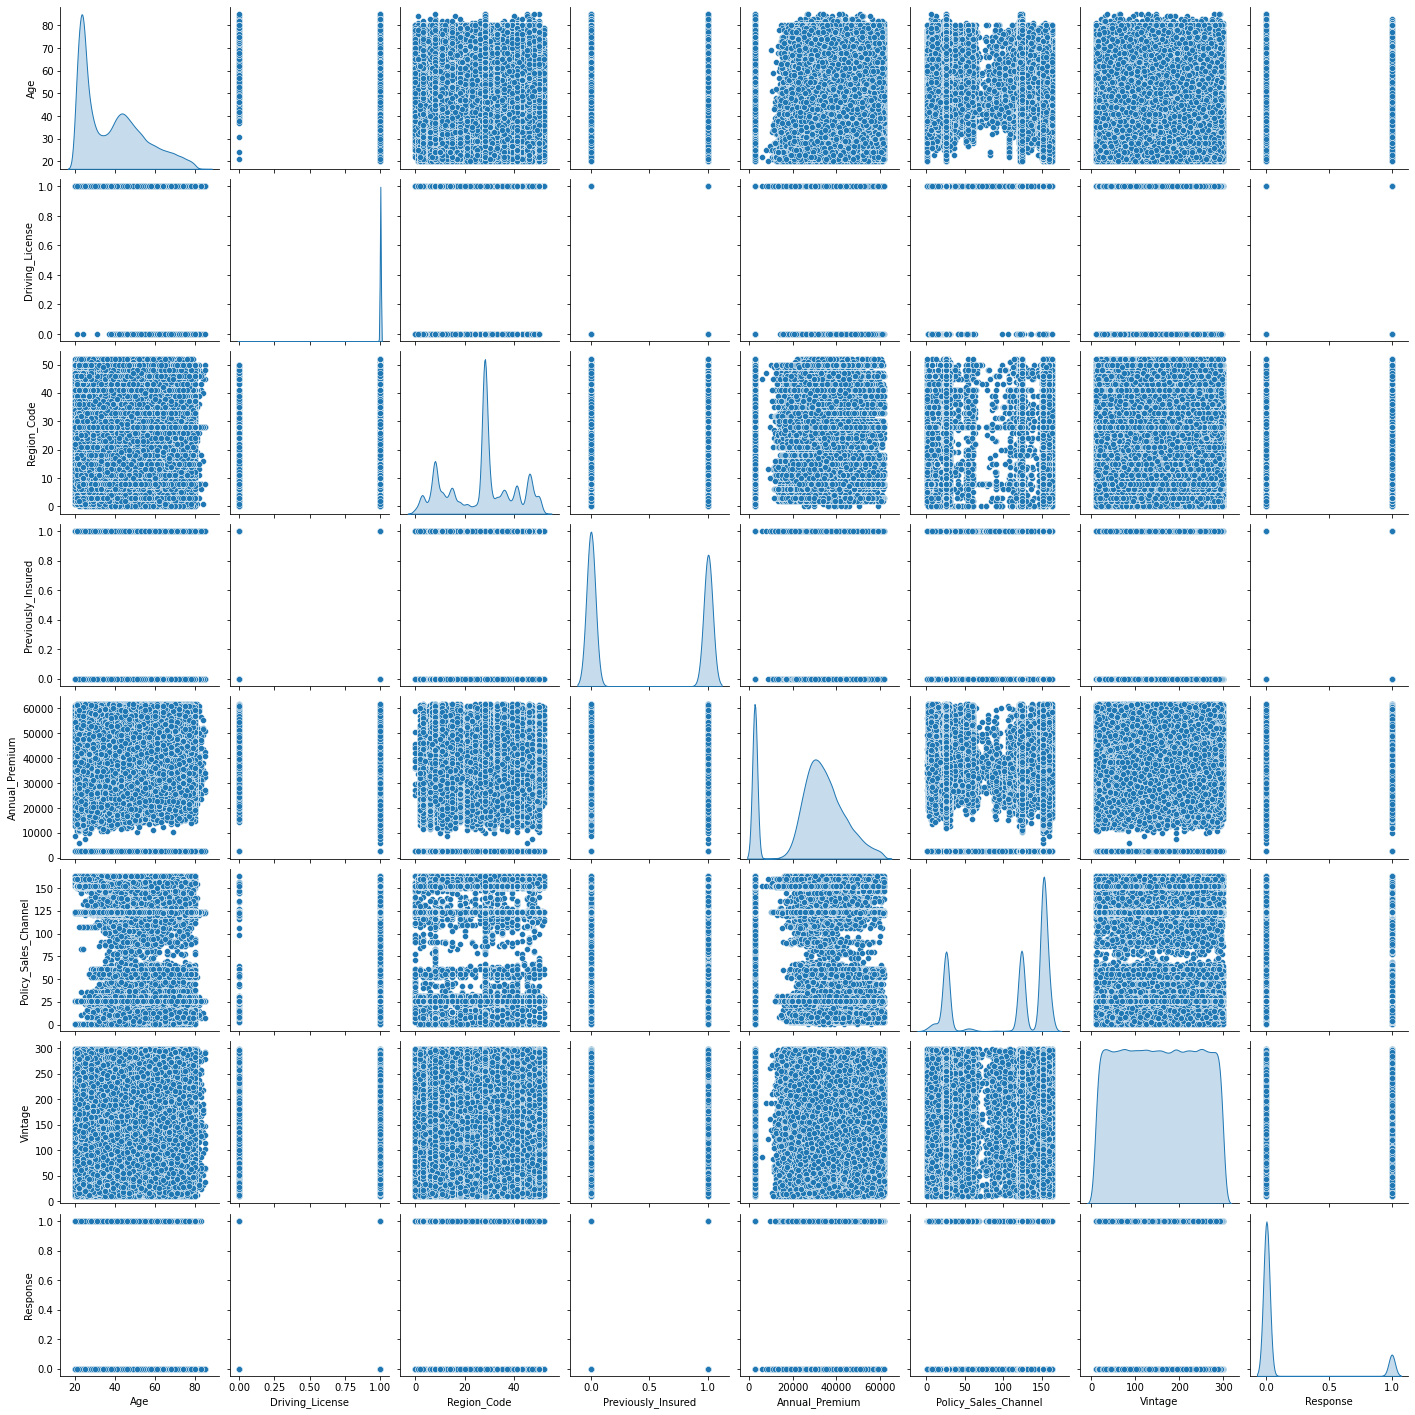

In [28]:
#Numerical Fearure
sns.pairplot(df_train, diag_kind = 'kde')

Dengan ini, kita tau bawa data ini non-linear, sehingga kita akan menggunakan model yang dapat digunakan untuk klasifikasi non-linear

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

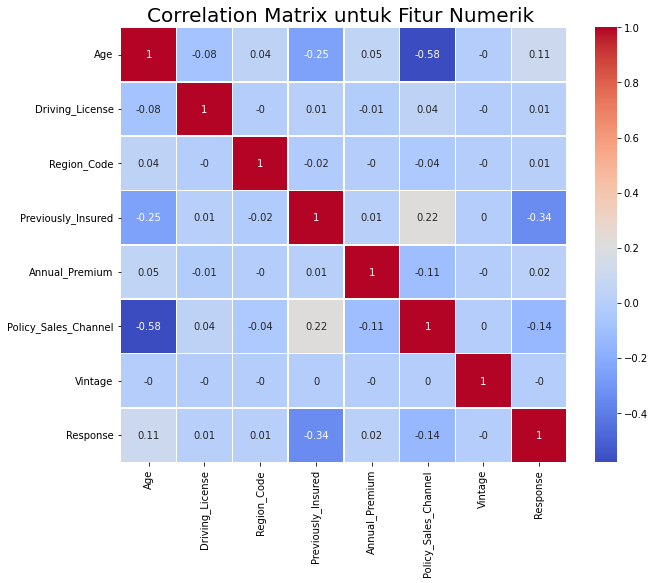

In [29]:
#Heat map untuk melihat korelasi antara feature satu dan feature lainnya
plt.figure(figsize = (10,8))
correlation_matrix = df_train.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size = 20)

Pada akhirnya kita akan meniadakan column: Region code, annual premium, vintage, dan driving liscense for the best result

## Data Preparation
Teknik yang akan digunakan untuk data preparation ini adalah:
1. One-hot-encoding data
2. Changing nama kolom agar dapat diterima oleh machine learning
3. Dropping feature yang kurang diperlukan
4. Splitting data
5. Standarizing data

###Encoding fitur kategori

In [30]:
for col in categorical_data:
  df_train = pd.concat([df_train, pd.get_dummies(df_train[col], prefix = col, drop_first = True)], axis = 1)
  df_train = df_train.drop(col, axis = 1)

df_train

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28.0,40454.0,26.0,217,1,1,1,0,0,1,1
1,76,3.0,33536.0,26.0,183,0,1,1,0,0,0,0
2,47,28.0,38294.0,26.0,27,1,1,1,0,0,1,1
3,21,11.0,28619.0,152.0,203,0,1,1,1,1,0,0
4,29,41.0,27496.0,152.0,39,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,26.0,30170.0,26.0,88,0,1,1,1,0,0,0
381105,30,37.0,40016.0,152.0,131,0,1,1,1,1,0,0
381106,21,30.0,35118.0,160.0,161,0,1,1,1,1,0,0
381107,68,14.0,44617.0,124.0,74,0,0,1,0,0,1,1


### Mengubah nama kolom

In [31]:
#Mengubah nama kolom agar dapat diproses oleh sistem
df_train.rename(columns = {"Vehicle_Age_< 1 Year": "Vehicle_Age_less_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_more_2_Years"}, inplace = True)
df_train.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_less_1_Year,Vehicle_Age_more_2_Years,Vehicle_Damage_Yes
0,44,28.0,40454.0,26.0,217,1,1,1,0,0,1,1
1,76,3.0,33536.0,26.0,183,0,1,1,0,0,0,0
2,47,28.0,38294.0,26.0,27,1,1,1,0,0,1,1
3,21,11.0,28619.0,152.0,203,0,1,1,1,1,0,0
4,29,41.0,27496.0,152.0,39,0,0,1,1,1,0,0


### Droping feature yang kurang dibutuhkan
Jika ingin mengetahui feature yang kurang dibutuhkan, Anda dapat dilihat dari heat map diatas

In [32]:
df_train = df_train.drop(['Region_Code', 'Annual_Premium', 'Vintage'], axis = 1)
df_train.head()

,Age,Policy_Sales_Channel,Response,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_less_1_Year,Vehicle_Age_more_2_Years,Vehicle_Damage_Yes
0,44,26.0,1,1,1,0,0,1,1
1,76,26.0,0,1,1,0,0,0,0
2,47,26.0,1,1,1,0,0,1,1
3,21,152.0,0,1,1,1,1,0,0
4,29,152.0,0,0,1,1,1,0,0


### Splitting data

In [33]:
from sklearn.model_selection import train_test_split
x = df_train.drop('Response',axis = 1)
y = df_train['Response']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


### Standarisasi data
standarisasi data menggunakan standarad scaler

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(x_train) 
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

##Model Training

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

print("Decision Tree")
print("Confusion Matrix")
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print("Accuracy            : {}".format(round(acc, 3)))

Decision Tree
Confusion Matrix
[[64580   557]
 [ 8713   308]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     65137
           1       0.36      0.03      0.06      9021

    accuracy                           0.87     74158
   macro avg       0.62      0.51      0.50     74158
weighted avg       0.82      0.87      0.83     74158

Accuracy            : 0.875


In [39]:
#Random Forest Tree Model
from sklearn.ensemble import RandomForestClassifier

print("Random Forest")
print("Confusion Matrix")
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
pred = forest.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print("Accuracy            : {}".format(round(acc, 3)))

Random Forest
Confusion Matrix
[[64523   614]
 [ 8667   354]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     65137
           1       0.37      0.04      0.07      9021

    accuracy                           0.87     74158
   macro avg       0.62      0.51      0.50     74158
weighted avg       0.82      0.87      0.83     74158

Accuracy            : 0.875


In [40]:
#XGBoost Model
from xgboost import XGBClassifier

print("XGB")
print("Confusion Matrix")
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
pred = XGB.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print("Accuracy            : {}".format(round(acc, 3)))

XGB
Confusion Matrix
[[65137     0]
 [ 9021     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     65137
           1       0.00      0.00      0.00      9021

    accuracy                           0.88     74158
   macro avg       0.44      0.50      0.47     74158
weighted avg       0.77      0.88      0.82     74158

Accuracy            : 0.878


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
